In [41]:
import warnings
warnings.filterwarnings('ignore')

In [42]:
import numpy as np
import pandas as pd
import pickle5 as pickle


In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


In [45]:
dataset_path = 'dataset.csv'
df = pd.read_csv(dataset_path, sep=';')

In [46]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,"23,9975","219,25","22,5","0,2475",0,0,0,0,0,"-157,25",...,0.0,N,U,U,U,U,U,Y,361.0,1000001
1,"57,4925","482,75","37,425","0,2475","22,75","9,1","9,1",0,0,"532,25",...,0.0,Z,U,U,U,U,U,Y,240.0,1000002
2,"16,99","10,25","16,99",0,0,0,0,0,0,"-4,25",...,0.0,N,U,Y,U,U,U,Y,1504.0,1000003
3,38,"7,5",38,0,0,0,0,0,0,"-1,5",...,0.0,U,Y,U,U,U,U,Y,1812.0,1000004
4,"55,23","570,5","71,98",0,0,0,0,0,0,"38,5",...,0.0,I,U,U,U,U,U,Y,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,Y,U,Y,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,N,U,U,Y,Y,Y,Y,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,U,Y,Y,U,U,U,N,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,S,U,U,U,U,U,N,75.0,1099999


In [82]:
df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,dwllsize,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays
0,23.997500,219.250000,22.500000,0.247500,0.000000,0.000000,0.000000,0.000000,0.000000,-157.250000,...,0,0.0,0,0,0,0,0,0,0,361.0
1,57.492500,482.750000,37.425000,0.247500,22.750000,9.100000,9.100000,0.000000,0.000000,532.250000,...,0,0.0,1,0,0,0,0,0,0,240.0
2,16.990000,10.250000,16.990000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-4.250000,...,0,0.0,0,0,1,0,0,0,0,1504.0
3,38.000000,7.500000,38.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.500000,...,1,0.0,2,1,0,0,0,0,0,1812.0
4,55.230000,570.500000,71.980000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,38.500000,...,2,0.0,3,0,0,0,0,0,0,434.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,67.939412,367.404644,45.461795,1.069070,45.211224,16.742914,16.408516,0.334466,3.469508,-115.991609,...,0,0.0,4,0,0,0,1,0,0,773.0
99996,68.816859,341.363607,53.209555,1.287971,32.901679,11.615699,11.424357,0.187996,2.993056,-111.705982,...,0,0.0,0,0,0,1,1,1,0,835.0
99997,50.211398,549.470356,43.180527,1.005909,5.160146,3.466557,3.348600,0.118573,5.769819,-313.114640,...,-1,0.0,2,1,1,0,0,0,1,433.0
99998,160.147283,1125.377349,71.852602,2.287154,206.862605,71.089386,59.790743,11.162902,3.202775,250.782769,...,-1,0.0,4,0,0,0,0,0,1,75.0


### Basic information of the Dataset

In [47]:
print("Number of rows", df.shape[0], "filas.")
print("Number of features", df.shape[1])
num_rows_with_nan = df.isna().any(axis=1).sum()
print("Number of NaN rows:", num_rows_with_nan)


Number of rows 100000 filas.
Number of features 100
Number of NaN rows: 73295


### Transformation of the Dataset

In [48]:
df = df.apply(lambda x: x.str.replace(',', '.', regex=False) if x.dtype == 'object' else x)
df = df.apply(pd.to_numeric, errors='ignore')
df=df.drop(columns=['Customer_ID'])
churn = df['churn']
#df=df.drop(columns=['churn'])


In [49]:
for columna in df.columns:
    if df[columna].dtype == 'object': 
        valores_unicos = df[columna].unique()
        print(f"Categorical value '{columna}': {valores_unicos}")
     

Categorical value 'new_cell': ['U' 'N' 'Y']
Categorical value 'crclscod': ['A' 'EA' 'C' 'B' 'BA' 'D' 'G' 'CA' 'I' 'AA' 'J' 'U' 'Z' 'K' 'E' 'E4' 'W'
 'DA' 'Y' 'CC' 'GA' 'D4' 'D5' 'H' 'ZA' 'JF' 'B2' 'IF' 'Z1' 'O' 'M' 'L'
 'U1' 'Z4' 'A2' 'V' 'TP' 'EM' 'C2' 'C5' 'S' 'EC' 'Z5' 'D2' 'GY' 'ZY' 'E2'
 'A3' 'V1' 'EF' 'Z2' 'CY' 'P1' 'ZF']
Categorical value 'asl_flag': ['N' 'Y']
Categorical value 'prizm_social_one': ['S' 'U' 'T' 'C' nan 'R']
Categorical value 'area': ['NORTHWEST/ROCKY MOUNTAIN AREA' 'CHICAGO AREA' 'GREAT LAKES AREA'
 'NEW ENGLAND AREA' 'DALLAS AREA' 'CENTRAL/SOUTH TEXAS AREA'
 'TENNESSEE AREA' 'MIDWEST AREA' 'PHILADELPHIA AREA' 'OHIO AREA'
 'HOUSTON AREA' 'SOUTHWEST AREA' 'NEW YORK CITY AREA'
 'ATLANTIC SOUTH AREA' 'SOUTH FLORIDA AREA' 'CALIFORNIA NORTH AREA'
 'DC/MARYLAND/VIRGINIA AREA' 'NORTH FLORIDA AREA' nan 'LOS ANGELES AREA']
Categorical value 'dualband': ['Y' 'N' 'T' 'U' nan]
Categorical value 'refurb_new': ['N' 'R' nan]
Categorical value 'hnd_webcap': ['WCMB' 'WC' nan 'UNK

In [50]:
for columna in df.columns:
    if df[columna].dtype == 'object':  
        df[columna] = pd.factorize(df[columna])[0]
        

To analyse missing value imputation using a regression model, you can follow these steps:

1. Identify the columns containing missing values.
2. Split your data into two sets: one containing rows with missing values and the other containing complete rows.
3. Use the complete rows to train a regression model that predicts the missing values based on other features.
4. Utilize the trained model to predict the missing values in the dataset with missing values.


In [51]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Identificar las columnas que contienen valores faltantes.
columnas_con_nan = df.columns[df.isnull().any()].tolist()

# Obtener índices de filas con NaN y sin NaN
filas_con_nan = df.index[df.isnull().any(axis=1)]
filas_sin_nan = df.index[~df.isnull().any(axis=1)]

# Filtrar solo las columnas con NaN
X_train = df.drop(columns=columnas_con_nan)

# Si hay al menos una fila con valores NaN y una fila sin valores NaN
if len(filas_con_nan) > 0 and len(filas_sin_nan) > 0:
    # Obtener etiquetas para las filas sin NaN
    etiquetas = df.loc[filas_sin_nan, columnas_con_nan]

    # Entrenar modelo de regresión lineal
    modelo_reg = LinearRegression()

    # Verificar que haya suficientes datos para entrenar
    if len(X_train) > 0 and len(etiquetas) > 0:
        modelo_reg.fit(X_train.loc[filas_sin_nan], etiquetas)
        
        # Predecir valores NaN
        valores_predichos = modelo_reg.predict(X_train.loc[filas_con_nan])

        # Crear una máscara para identificar valores NaN
        mascara_nan = df.isnull()

        # Asignar los valores predichos solo a los valores NaN en el DataFrame original.
        df.loc[filas_con_nan, columnas_con_nan] = np.where(mascara_nan.loc[filas_con_nan, columnas_con_nan], valores_predichos, df.loc[filas_con_nan, columnas_con_nan])


### Feature Analysis

In [52]:
# Calculate the correlation matrix

correlation_matrix = df.corr()

# Extract the correlations with the churn variable
churn_correlation = correlation_matrix['churn'].drop('churn')

# Sort the correlations by absolute value
churn_correlation_sorted = churn_correlation.abs().sort_values(ascending=False)

# Display the correlations
print("Correlations with churn:")
print(churn_correlation_sorted)

Correlations with churn:
eqpdays          0.112690
asl_flag         0.069473
totmrc_Mean      0.068545
mou_Mean         0.056779
mou_cvce_Mean    0.052042
                   ...   
rv               0.001387
kid11_15         0.001072
recv_sms_Mean    0.000812
datovr_Mean      0.000471
kid6_10          0.000214
Name: churn, Length: 98, dtype: float64


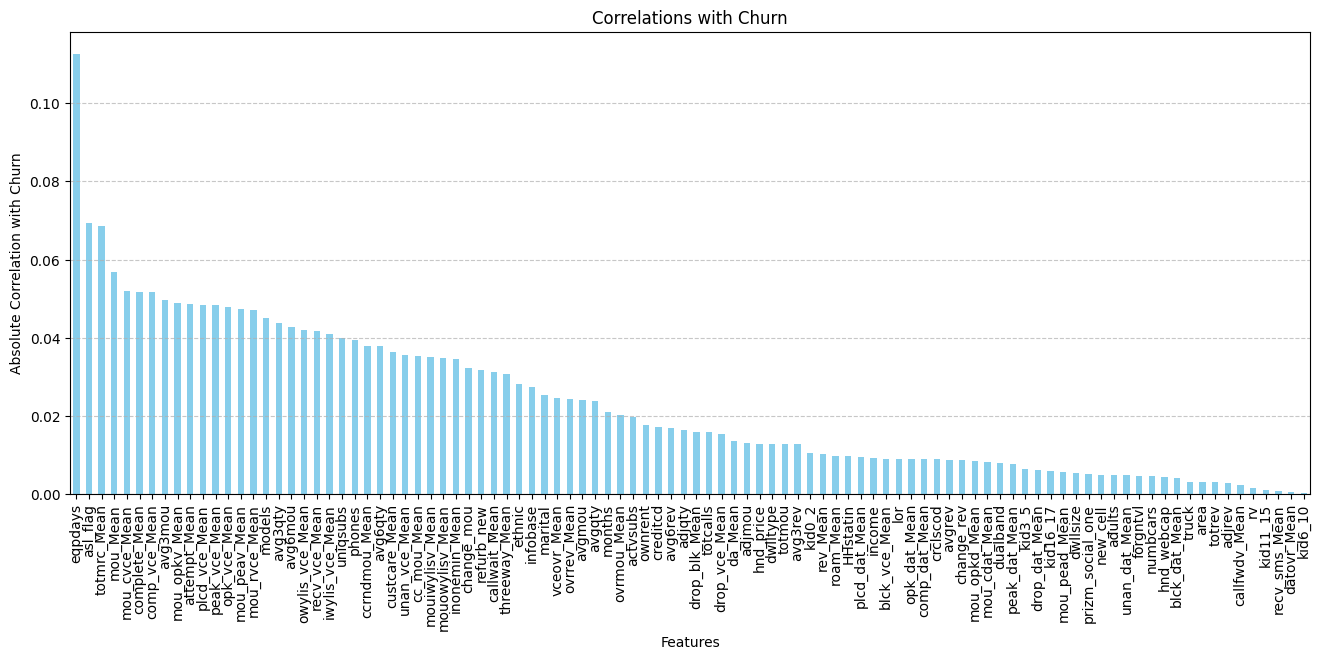

In [53]:
# Plot the bar chart
plt.figure(figsize=(16, 6))
churn_correlation_sorted.plot(kind='bar', color='skyblue')
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Churn')
plt.title('Correlations with Churn')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

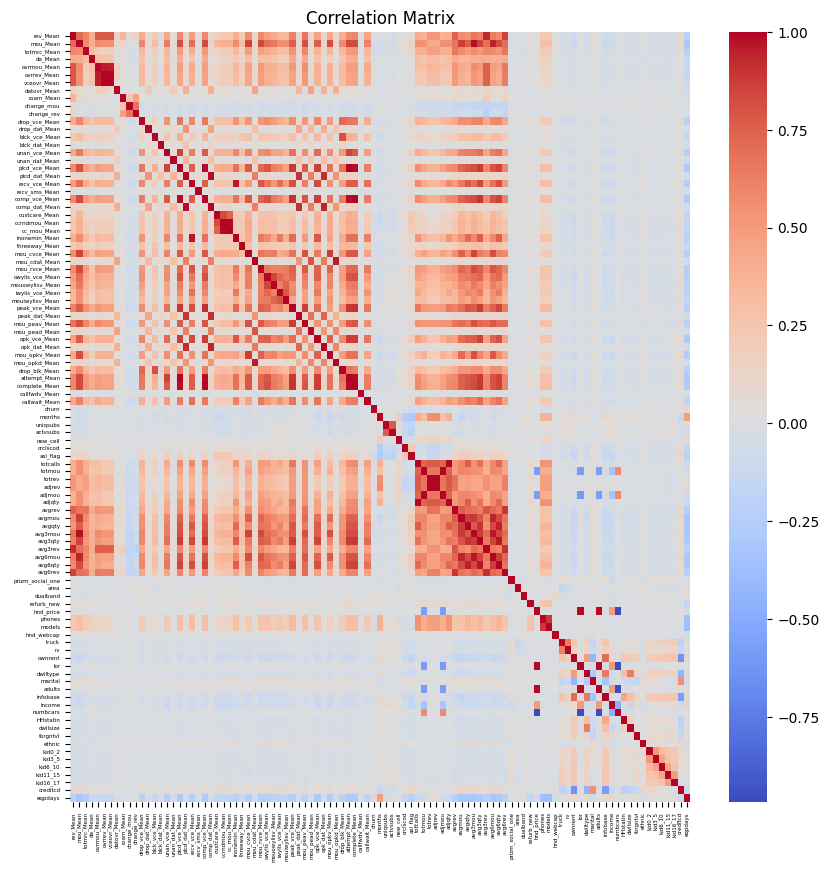

In [54]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(10,10))

sns.heatmap(correlation_matrix, annot=None, cmap='coolwarm', fmt=".2f",xticklabels=True, yticklabels=True)

plt.xticks(fontsize=4)
plt.yticks(fontsize=4)

# Add title

plt.title('Correlation Matrix')

# Show the heatmap
plt.show()


In [55]:
corr_target =abs(correlation_matrix['churn'])

features_high_corr = corr_target[corr_target> 0.00800].index.tolist()

features_high_corr.remove('churn')

In [56]:
print(len(features_high_corr))

73


### Train Model (With all features)

In [57]:
X = df.drop(columns=['churn'])  
y = churn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [120]:
from sklearn.model_selection import GridSearchCV, KFold
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Let's assume you have your data in X_train, X_test, y_train, and y_test

# Define the hyperparameter search space
param_grid = {
    'n_estimators': [100,200,300],
    'max_depth': [7, 8],
    'learning_rate': [0.05, 0.1, 0.5],
}

# Create an XGBoost classifier
xgb_classifier = XGBClassifier()
    
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, scoring='accuracy')

# Fit the model using grid search
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best hyperparameters:", best_params)

# Predict on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the best model:", accuracy)

Best hyperparameters: {'learning_rate': 0.5, 'max_depth': 8, 'n_estimators': 300}
Accuracy of the best model: 0.8523666666666667


In [83]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold, cross_val_score
import numpy as np

# Define the XGBoost classifier with specified hyperparameters
model = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7, objective='binary:logistic',
                    silent=False, nthread=2)

# Define the k-fold cross-validation splitter
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')

# Calculate and display the average of the results
print("Average accuracy:", np.mean(results))


Average accuracy: 0.6539571428571428


In [59]:
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, nthread=2,
              num_parallel_tree=None, ...)

In [60]:
predictions = model.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6688
Precision: 0.6699075011815543
Recall: 0.6628365288262409
F1 Score: 0.6663532572196105
Confusion Matrix:
 [[10142  4889]
 [ 5047  9922]]
ROC AUC Score: 0.6687877009110248


### Train with the most important features based on ordinary correlation study

In [86]:
len(features_high_corr)

73

In [87]:
X = df.drop(columns=['churn'])  
y = churn 
X_train, X_test, y_train, y_test = train_test_split(X[features_high_corr], y, test_size=0.3, random_state=42)


In [88]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold, cross_val_score


model_cor = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7,objective='binary:logistic',
                    silent=False, nthread=2)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model_cor, X_train, y_train, cv=kfold, scoring='accuracy')


print("Average accuracy:", np.mean(results))

Average accuracy: 0.6547571428571428


In [89]:
model_cor.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None, nthread=2,
              num_parallel_tree=None, ...)

In [90]:
predictions = model_cor.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.6527
Precision: 0.6541327913279132
Recall: 0.6449996659763512
F1 Score: 0.649534124928521
Confusion Matrix:
 [[9926 5105]
 [5314 9655]]
ROC AUC Score: 0.652684118797503


### feature importance

In [91]:
# Obtener la importancia de las características
importances = model_cor.feature_importances_

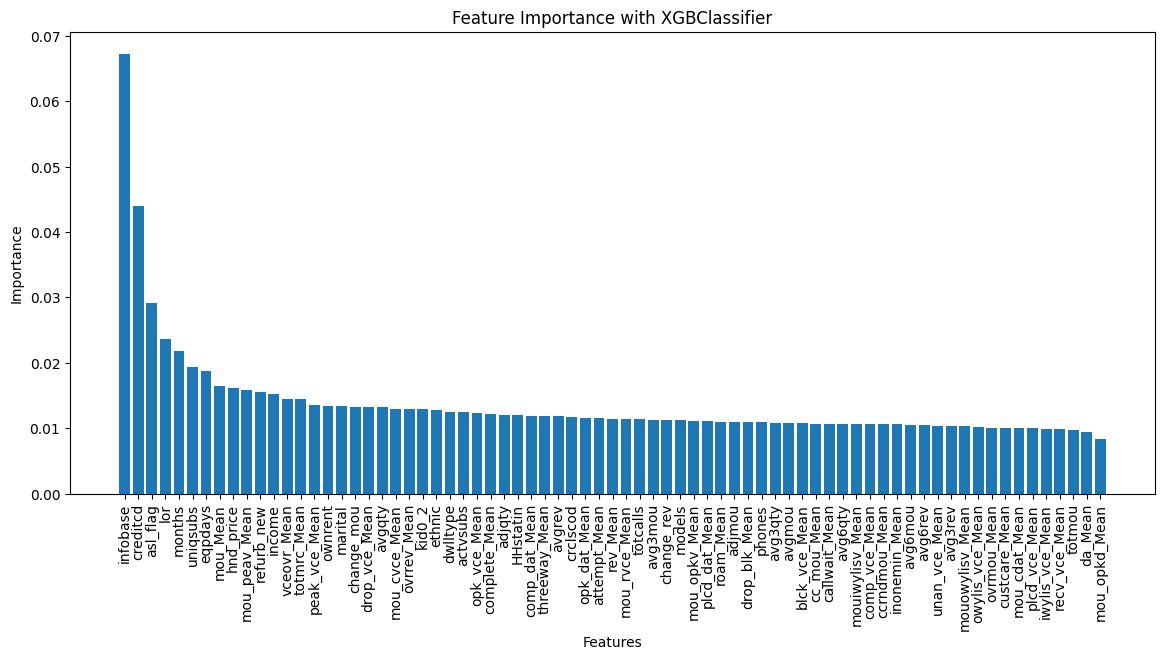

In [92]:
# Sort the indices in descending order based on feature importances
indices_ordered = np.argsort(importances)[::-1]  
ordered_importances = [importances[i] for i in indices_ordered]
ordered_features = [features_high_corr[i] for i in indices_ordered]

plt.figure(figsize=(14, 6))
# Create the bar plot
plt.bar(range(len(ordered_importances)), ordered_importances, tick_label=ordered_features)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=90) 
plt.title('Feature Importance with XGBClassifier')
plt.show()

In [98]:

importances = model_cor.feature_importances_
feature_names = X_train.columns.to_list() 
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [108]:
threshold = 0.011 # Por ejemplo, puedes elegir un umbral del 10%

selected_features = feature_importance_df[feature_importance_df['Importance'] > threshold]['Feature'].tolist()
print(selected_features)

['mou_cdat_Mean', 'da_Mean', 'roam_Mean', 'owylis_vce_Mean', 'change_rev', 'models', 'mou_opkd_Mean', 'creditcd', 'avg6rev', 'threeway_Mean', 'avg6mou', 'plcd_vce_Mean', 'eqpdays', 'asl_flag', 'comp_dat_Mean', 'mouowylisv_Mean', 'custcare_Mean', 'hnd_price', 'refurb_new', 'cc_mou_Mean', 'ethnic', 'uniqsubs', 'totmou', 'recv_vce_Mean', 'ovrmou_Mean', 'mou_opkv_Mean', 'avgrev', 'totcalls', 'avg3qty', 'iwylis_vce_Mean', 'change_mou', 'kid0_2', 'avgmou', 'plcd_dat_Mean', 'crclscod', 'mou_rvce_Mean', 'infobase', 'actvsubs', 'adjmou', 'callwait_Mean', 'mou_peav_Mean', 'avg3rev', 'opk_dat_Mean', 'peak_vce_Mean', 'mou_Mean', 'phones']


In [109]:
len(selected_features)

46

In [110]:
# Separar las características de la variable objetivo
X = df.drop(columns=['churn'])  # características
y = churn  # variable objetivo
X_train, X_test, y_train, y_test = train_test_split(X[selected_features], y, test_size=0.3, random_state=42)

In [111]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

from sklearn.model_selection import KFold, cross_val_score


model_cor_sel_fea = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7,objective='binary:logistic',
                    silent=False, nthread=2)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
results = cross_val_score(model_cor_sel_fea, X_train, y_train, cv=kfold, scoring='accuracy')

print("Average accuracy:", np.mean(results))

Average accuracy: 0.5906142857142858


In [112]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV


model_cor_sel_fea = XGBClassifier(learning_rate=0.5, n_estimators=400, max_depth=7,objective='binary:logistic',
                    silent=False, nthread=2)
model_cor_sel_fea.fit(X_train, y_train)
y_pred = model_cor_sel_fea.predict(X_test)


accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.5936333333333333


In [113]:
predictions = model_cor_sel_fea.predict(X_test)

# Calculating metrics
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
roc_auc = roc_auc_score(y_test, predictions)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("Confusion Matrix:\n", conf_matrix)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.5936333333333333
Precision: 0.5949159491594916
Recall: 0.5816019774200013
F1 Score: 0.5881836300374962
Confusion Matrix:
 [[9103 5928]
 [6263 8706]]
ROC AUC Score: 0.593608519812389


In [75]:
df.shape

(100000, 99)

In [96]:
X_train.shape

(70000, 73)

In [81]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Paso 1: Cargar el conjunto de datos
# Supongamos que ya tienes cargado tu conjunto de datos en X_train, X_test, y_train, y_test

# Paso 2: Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Paso 3: Construir y entrenar el modelo de red neuronal
mlp_classifier = MLPClassifier(hidden_layer_sizes=(700,), activation='relu', solver='adam', max_iter=1000, random_state=42)
mlp_classifier.fit(X_train_scaled, y_train)

# Paso 4: Hacer predicciones
y_pred = mlp_classifier.predict(X_test_scaled)

# Paso 5: Calcular la precisión
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.6302


### Save model in a pickle

In [36]:
# Guardar el modelo en un archivo pickle
with open("modelo_xgb.pkl", "wb") as f:
    pickle.dump(xgb_classifier, f)

In [37]:
# Guardar el modelo en un archivo pickle
with open("modelo_mlp.pkl", "wb") as f:
    pickle.dump(mlp_classifier, f)